# Linear Regression:

In [61]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [62]:
'''Using only samples from test and train set that have area greater than 0'''
final_train_data= train_data.loc[train_data['area'] > 0]
final_train_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
124,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0,0.36
125,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0,0.43
126,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0,0.47
127,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0,0.55
128,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0,0.61


In [63]:
train_X = pd.DataFrame(final_train_data, columns = ['X','Y',\
                                                    'month','day',\
                                                    'FFMC','DMC',\
                                                    'DC','ISI',\
                                                    'temp','RH',\
                                                    'wind','rain'])
train_X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
124,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0
125,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0
126,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0
127,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0
128,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0


In [64]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

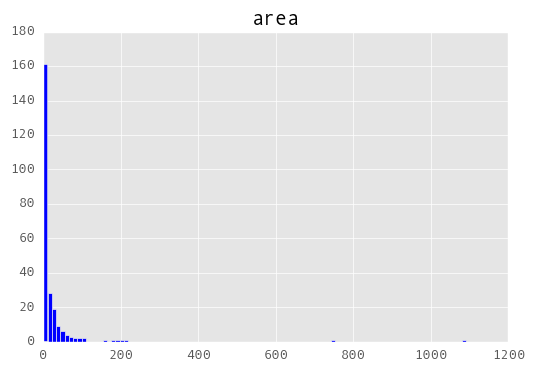

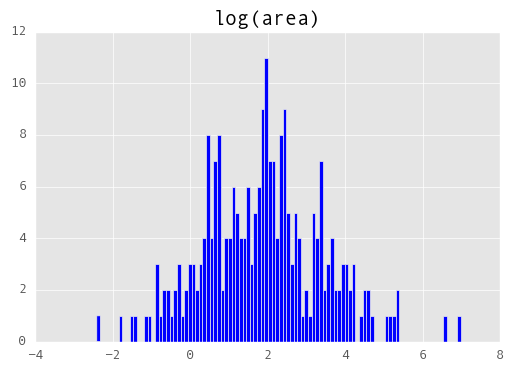

In [65]:
train_Y = pd.DataFrame(final_train_data, columns = ['area'])
train_Y.head()
train_Y.hist(column='area', bins=100, color='b')
log_train_Y = pd.DataFrame(columns=['log(area)'])
log_train_Y['log(area)'] = np.log(train_Y.area)
pd.DataFrame(log_train_Y).hist(column='log(area)',\
                               bins=100, color='b')
plt.show()

***The plot of area is skewed to the left and has a lot of outliers. Plotting log(area), we get a relatively even normal distribution. It reduces the skewness of the data. ***

#### Implementing the  linear regression model to fit the outcome data using the ordinary least squares (OLS) solution

In [66]:
train_X['integer'] = pd.DataFrame(np.ones(train_Y.shape),\
                                  index=train_X.index)
cols = train_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
train_X = train_X[cols]
train_X.head()

,integer,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
124,1,9,9,7,2,85.8,48.3,313.4,3.9,18.0,42,2.7,0
125,1,1,4,9,2,91.0,129.5,692.6,7.0,21.7,38,2.2,0
126,1,2,5,9,1,90.9,126.5,686.5,7.0,21.9,39,1.8,0
127,1,1,2,8,3,95.5,99.9,513.3,13.2,23.3,31,4.5,0
128,1,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0


In [67]:
coeffs = inv(train_X.as_matrix()\
             .transpose()\
             .dot(train_X.as_matrix()))\
.dot(train_X.as_matrix()\
     .transpose())\
.dot(train_Y.as_matrix())

In [68]:
print "The coefficients obtained using OLS is : ", coeffs

The coefficients obtained using OLS is :  [[ 2.11210487]
 [ 2.81904658]
 [-1.02898407]
 [ 3.16160504]
 [ 2.79333717]
 [-0.02815015]
 [ 0.19612805]
 [-0.03895839]
 [-1.34555654]
 [ 0.91209888]
 [-0.69033134]
 [ 1.08334664]
 [-2.24346366]]


#### Testing the model on the test data and computing the Residual sum of squares 

In [69]:
final_test_data = test_data.loc[test_data['area'] > 0]
final_test_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
1,5,4,9,5,92.1,99.0,745.3,9.6,10.1,75,3.6,0,3.71
3,3,4,9,7,89.6,84.1,714.3,5.7,23.8,35,3.6,0,5.18
6,7,4,9,5,92.1,99.0,745.3,9.6,19.8,47,2.7,0,1.72
7,8,6,8,7,90.2,99.6,631.2,6.3,16.2,59,3.1,0,32.07
8,1,2,7,6,90.0,51.3,296.3,8.7,16.6,53,5.4,0,0.71


In [70]:
test_X = pd.DataFrame(final_test_data, columns = ['X','Y',\
                                                  'month','day',\
                                                  'FFMC','DMC',\
                                                  'DC','ISI',\
                                                  'temp','RH',\
                                                  'wind','rain'])
test_Y = pd.DataFrame(final_test_data, columns = ['area'])

In [71]:
predicted = test_X.as_matrix().dot(coeffs[1:])

test_Y_final = [item for sublist \
                in test_Y.as_matrix().tolist()\
                for item in sublist]
rss = 0
flattened_predicted = predicted.flatten()
for i in range(len(flattened_predicted)):
    flattened_predicted[i] = flattened_predicted[i] + \
    coeffs[0].tolist()[0]
for i in range(len(flattened_predicted)):
    rss += pow(flattened_predicted[i] - test_Y_final[i],2)
print "The Residual sum of squares is : ", rss

The Residual sum of squares is :  103808.628527


#### Correlation between the actual and predicted outcome variable

In [72]:
from scipy.stats.stats import pearsonr   
a = flattened_predicted
b = test_Y_final   
print "The correlation between the actual and predicted outcome variable is : ", \
pearsonr(a,b)[0]

The correlation between the actual and predicted outcome variable is :  0.165176411332


** The correlation between the actual and predicted outcome variable is :  0.165176411332 **
